# Pet Finder - Machine Learning Project

*Antonia Zară and Doroteea Șandor, group 30433*

<img src="dog.jpg"/>


## About the project

Pet Finder is a project meant to aid the adoption process of different animals from shelters in Malaysia. We want to predict the adoptability of pets, based on their traits such as name, breed, color, whether ot not they are vaccinated, sterilized or dewormed, and their location. If successful, the program will help rescuers around the country to better the online profiles of their pets, thus increasing their chances of being adopted.

The initial competition took place on Kaggle, which we used for description, hints, and data set. It can be found below:

<table align="left">
  <td>
    <a target="_blank" href="https://www.kaggle.com/c/petfinder-adoption-prediction"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

The data set represents examples of animals with the characteristics presented above and their adoption speed, which represents their adoptability. The lower the better for our little fur friends. Our task is to determine as accurately as possible the adoption speed of a pet based on all the examples from the train set, in order to increase their chances of finding a happy family.

## Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the data

In [2]:
import os
import pandas as pd

ROOT = r"D:\3.2\IS\Project\pet-finder"
DATA_PATH = os.path.join(ROOT,"data")
TRAIN_PATH = os.path.join(DATA_PATH, "train")
TEST_PATH = os.path.join(DATA_PATH, "test")

def load_pet_data(train_path = TRAIN_PATH):
    csv_path = os.path.join(train_path, "train.csv")
    return pd.read_csv(csv_path)

def load_breed_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "breed_labels.csv")
    return pd.read_csv(csv_path)

def load_color_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "color_labels.csv")
    return pd.read_csv(csv_path)

def load_state_data(data_path = DATA_PATH):
    csv_path = os.path.join(data_path, "state_labels.csv")
    return pd.read_csv(csv_path)

## Quick look at the data

In [3]:
pets = load_pet_data()
pets.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
pets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13736 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 non-null  int64  
 18  Rescue

**Let's examine a few types of breeds**

In [5]:
breeds = load_breed_data()
breeds.head()

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
2,3,1,Airedale Terrier
3,4,1,Akbash
4,5,1,Akita


**Let's examine a few types of colors**

In [6]:
colors = load_color_data()
colors.head()

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream


**Let's examine a few types of states**

In [7]:
states = load_state_data()
states.head()

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan


**Merge all tables together for better readibility**

In [16]:
merged = pets.merge(breeds, left_on = 'Breed1', right_on = 'BreedID')
merged = merged.merge(breeds, left_on = 'Breed2', right_on = 'BreedID')

merged = merged.merge(colors, left_on = 'Color1', right_on = 'ColorID')
merged = merged.merge(colors, left_on = 'Color2', right_on = 'ColorID')
merged = merged.merge(colors, left_on = 'Color3', right_on = 'ColorID')

merged = merged.merge(states, left_on = 'State', right_on = 'StateID')

In [17]:
merged.head()

,Type_x,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Type,BreedName_y,ColorID_x,ColorName_x,ColorID_y,ColorName_y,ColorID,ColorName,StateID,StateName
0,2,Golden Tabby Girl,1,299,266,2,2,3,5,2,...,2,Domestic Short Hair,2,Brown,3,Golden,5,Cream,41326,Selangor
1,2,Ogen & Oyen,2,265,266,3,2,3,5,1,...,2,Domestic Short Hair,2,Brown,3,Golden,5,Cream,41326,Selangor
2,2,Money,1,266,265,2,2,3,5,1,...,2,Domestic Medium Hair,2,Brown,3,Golden,5,Cream,41326,Selangor
3,2,Noah And Nellie,2,299,299,3,2,3,5,1,...,2,Tabby,2,Brown,3,Golden,5,Cream,41326,Selangor
4,1,Karlo,2,307,307,1,2,3,5,2,...,1,Mixed Breed,2,Brown,3,Golden,5,Cream,41326,Selangor


**We look at the most and least popular breeds**

In [8]:
(pets.merge(breeds, left_on = 'Breed1', right_on = 'BreedID'))["BreedName"].value_counts()

Mixed Breed                     5927
Domestic Short Hair             3634
Domestic Medium Hair            1258
Tabby                            342
Domestic Long Hair               296
                                ... 
Chocolate Labrador Retriever       1
Dutch Shepherd                     1
Welsh Corgi                        1
Field Spaniel                      1
Pointer                            1
Name: BreedName, Length: 175, dtype: int64

In [9]:
pets.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


**Histograms**

Saving figure attribute_histogram_plots


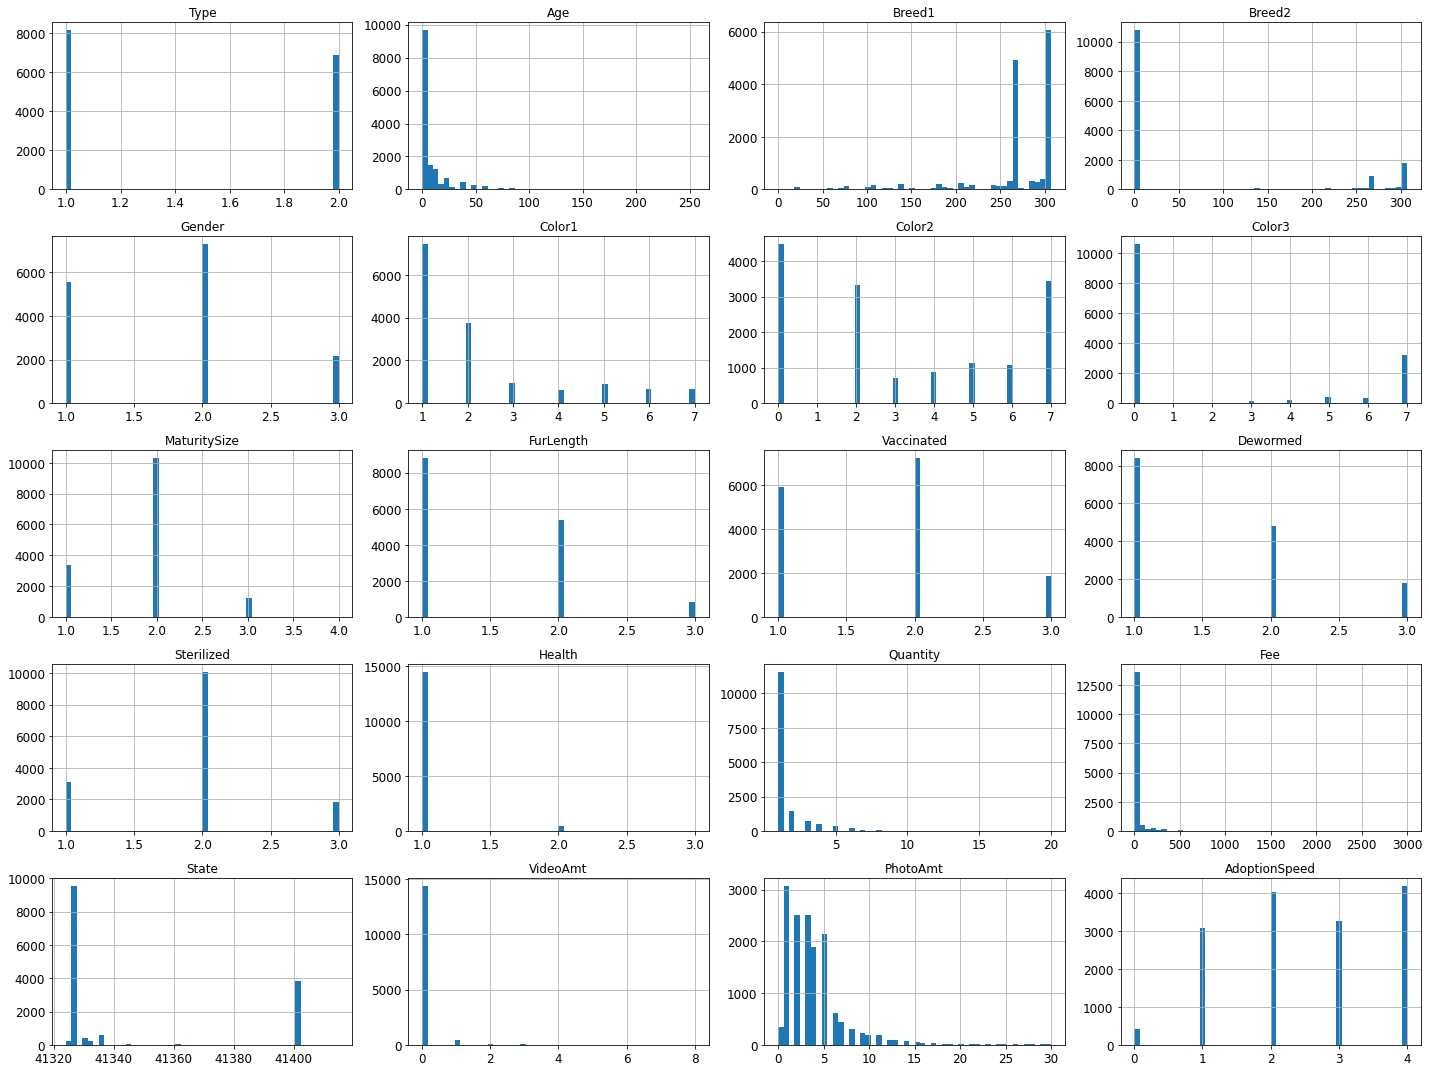

In [19]:
import matplotlib.pyplot as plt

pets.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

## The Test Set

We already have a test set supplied separately from the data set found on Kaggle, therefore in this section we will focus mainly on loading it and showcasing it.

In [23]:
def load_test_data(test_path = TEST_PATH):
    csv_path = os.path.join(test_path, "test.csv")
    return pd.read_csv(csv_path)

In [24]:
tests = load_test_data()
tests.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Sterilized,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt
0,2,Dopey & Grey,8,266,266,1,2,6,7,1,...,2,1,2,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Dopey Age: 8mths old Male One half of a pair, ...",e2dfc2935,2.0
1,2,Chi Chi,36,285,264,2,1,4,7,2,...,1,2,1,0,41326,2ece3b2573dcdcebd774e635dca15fd9,0,"Please note that Chichi has been neutered, the...",f153b465f,1.0
2,2,Sticky,2,265,0,1,6,7,0,2,...,2,1,1,200,41326,e59c106e9912fa30c898976278c2e834,0,"Sticky, named such because of his tendency to ...",3c90f3f54,4.0
3,1,Dannie & Kass [In Penang],12,307,0,2,2,5,0,2,...,1,1,2,0,41326,e59c106e9912fa30c898976278c2e834,0,Dannie and Kass are mother and daughter. We en...,e02abc8a3,5.0
4,2,Cuddles,12,265,0,1,2,3,7,2,...,1,1,1,0,41326,e59c106e9912fa30c898976278c2e834,0,"Extremely cuddly cat, hence the origin of his ...",09f0df7d1,5.0


In [32]:
rows_count = len(pets)
print("The train set has ", rows_count, " examples.")

rows_count = len(tests)
print("The test set has ", rows_count, " examples.")

The train set has  14993  examples.
The test set has  3972  examples.


*We can observe the fact that the test set has the size 26% of the size of the train set, which we consider to be more than enough in the case of testing and training our program.*

## Visualizing the data further

<AxesSubplot:>

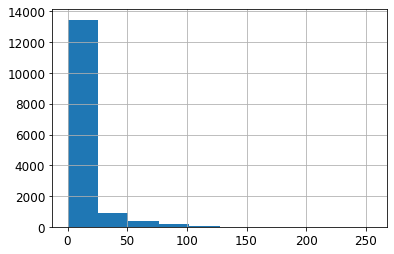

In [33]:
pets["Age"].hist()

Saving figure better_visualization_plot


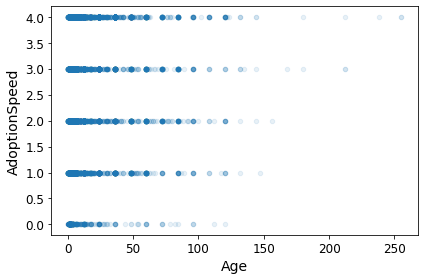

In [34]:
pets.plot(kind="scatter", x="Age", y="AdoptionSpeed", alpha=0.1)
save_fig("age_adoption_speed_plot")

The plot shows us that age has very little relevance to the adoptability of a pet when considered alone.

## Looking for correlations

In [64]:
pets.corr()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
Type,1.000000,-0.147162,0.057724,-0.043568,0.060843,0.097680,0.246333,0.201693,-0.171811,0.003036,0.102907,0.025508,0.006737,-0.006864,0.036423,-0.042134,0.124549,-0.005967,0.049368,-0.091240
Age,-0.147162,1.000000,-0.314346,-0.041010,-0.123423,0.090378,-0.039427,-0.053546,0.093673,0.153092,-0.136061,-0.053360,-0.189450,0.103215,-0.113076,0.089168,0.024523,-0.015969,-0.084778,0.100510
Breed1,0.057724,-0.314346,1.000000,-0.157053,0.071321,-0.035510,-0.007081,-0.000682,-0.010507,-0.108059,0.046518,0.013216,0.052698,-0.034893,0.090194,-0.189526,-0.026832,0.020626,0.043395,0.107834
Breed2,-0.043568,-0.041010,-0.157053,1.000000,0.056907,-0.020324,0.003015,0.035679,0.049879,0.106220,0.005638,-0.009817,-0.005989,-0.029285,0.038125,0.013508,-0.037993,0.001569,0.045953,-0.018642
Gender,0.060843,-0.123423,0.071321,0.056907,1.000000,-0.115351,0.026507,0.259309,-0.091819,-0.030404,0.078702,0.091431,0.040645,-0.045177,0.494489,-0.050491,0.002564,0.016816,0.098435,0.057622
Color1,0.097680,0.090378,-0.035510,-0.020324,-0.115351,1.000000,-0.113290,-0.282897,-0.029468,0.066967,-0.017475,-0.019318,-0.037050,0.024410,-0.116688,0.054180,0.024012,-0.006435,-0.041323,-0.044192
Color2,0.246333,-0.039427,-0.007081,0.003015,0.026507,-0.113290,1.000000,0.088742,-0.065155,-0.008764,0.026193,0.005812,0.007370,-0.004307,0.019876,-0.017308,0.026944,0.023983,0.059113,-0.038579
Color3,0.201693,-0.053546,-0.000682,0.035679,0.259309,-0.282897,0.088742,1.000000,-0.051730,0.013581,0.054053,0.048617,0.038899,-0.024782,0.272548,-0.019839,0.010554,0.019526,0.103662,-0.007014
MaturitySize,-0.171811,0.093673,-0.010507,0.049879,-0.091819,-0.029468,-0.065155,-0.051730,1.000000,0.095142,-0.087722,-0.067352,-0.066321,-0.012957,-0.042832,0.041144,-0.062584,0.017032,0.015593,0.045653
FurLength,0.003036,0.153092,-0.108059,0.106220,-0.030404,0.066967,-0.008764,0.013581,0.095142,1.000000,-0.006010,0.016463,0.032092,0.028096,-0.038388,0.159693,-0.029317,-0.014740,-0.031557,-0.091337


In [65]:
corr_matrix = pets.corr()
corr_matrix["AdoptionSpeed"].sort_values(ascending=False)

AdoptionSpeed    1.000000
Breed1           0.107834
Age              0.100510
Quantity         0.062931
Gender           0.057622
MaturitySize     0.045653
Health           0.029382
State            0.013119
VideoAmt        -0.000571
Fee             -0.004017
Color3          -0.007014
Dewormed        -0.013210
Breed2          -0.018642
PhotoAmt        -0.023233
Color2          -0.038579
Color1          -0.044192
Vaccinated      -0.059043
Sterilized      -0.083447
Type            -0.091240
FurLength       -0.091337
Name: AdoptionSpeed, dtype: float64

From the correlation table above, we can observe the fact that the adoption breed is the most closely correlated to the breed of the animal, but still, a correlation of approximately 0.107 is quite small and needs further reassessing and observing of the data.

Saving figure scatter_matrix_plot


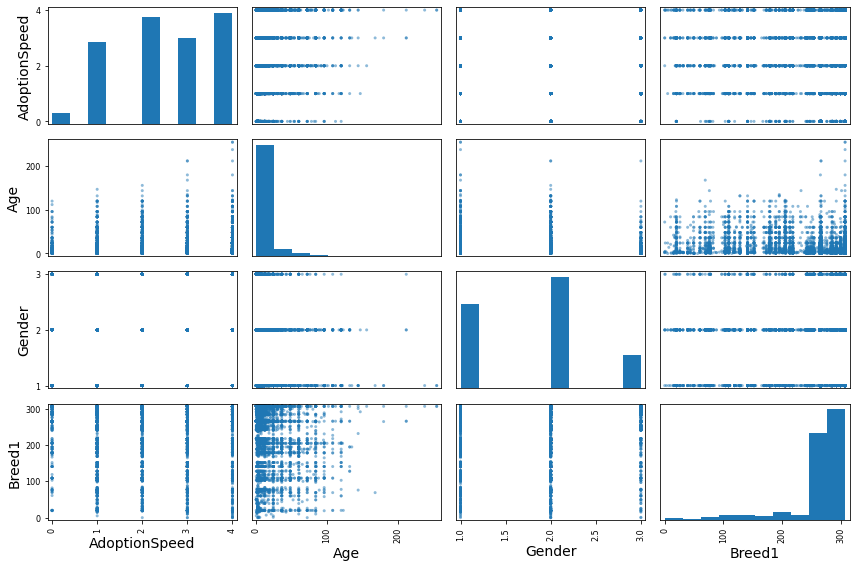

In [66]:
from pandas.plotting import scatter_matrix

attributes = ["AdoptionSpeed", "Age", "Gender",
              "Breed1"]
scatter_matrix(pets[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Analyzing the graphs above, we can observe the fact that age and breed are correlated, as expected, considering the fact that the age an animal can have is dependent on the breed they are. Moreover, we can observe that the first gender of the table, the males, tend to live longer than females in the pet domain. Regarding the gender and breed correlation, we notice that the third gender appears more in the breeds with a higher index than in those with a lower one (the name of the breeds and their identifier can be found in the 'breeds' series). The adoption speed is once again, hard to analyze when considering only one attribute.